<a href="https://colab.research.google.com/github/romanescobar/Challenge-Telecom-X-parte-2/blob/main/TelecomX_LATAM_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🛠️ Preparación de los Datos

In [71]:

!pip install imbalanced-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

print("Librerías importadas e imbalanced-learn instalado.")

Librerías importadas e imbalanced-learn instalado.


In [72]:

try:
    df = pd.read_csv('datos_tratados.csv')
    print("DataFrame 'df' cargado exitosamente desde 'datos_tratados.csv'.")
    print("\nPrimeras 5 filas del DataFrame cargado:")
    print(df.head())
    print("\nInformación del DataFrame cargado:")
    df.info()
except FileNotFoundError:
    print("Error: El archivo 'datos_tratados.csv' no fue encontrado.")
    print("Asegúrate de haberlo guardado correctamente en la Parte 1 y de que esté en la misma ubicación.")
    exit()


DataFrame 'df' cargado exitosamente desde 'datos_tratados.csv'.

Primeras 5 filas del DataFrame cargado:
   Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0      0       0              0        1           1       9             1   
1      0       1              0        0           0       9             1   
2      1       1              0        0           0       4             1   
3      1       1              1        1           0      13             1   
4      1       0              1        1           0       3             1   

   MultipleLines  OnlineSecurity  OnlineBackup  ...  Charges.Total  \
0              0               0             1  ...         593.30   
1              1               0             0  ...         542.40   
2              0               0             0  ...         280.85   
3              0               0             1  ...        1237.85   
4              0               0             0  ...         267.40   

   Cu

In [73]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
    print("\nColumna 'Unnamed: 0' (índice redundante) eliminada.")
print("\nVerificación de Columnas Irrelevantes completada. Columnas actuales:")
print(df.columns.tolist())
print("\nVerificación de Encoding de Variables Categóricas completada. Las variables ya están en formato numérico.")


Verificación de Columnas Irrelevantes completada. Columnas actuales:
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Num_Services']

Verificación de Encoding de Variables Categóricas completada. Las variables ya están en formato numérico.


In [74]:
print("\n--- Verificación de la Proporción de Cancelación (Churn) ---")
churn_proportion = df['Churn'].value_counts(normalize=True) * 100
print("Proporción de Clientes por Estado de Evasión (Churn):")
print(churn_proportion)
print(f"\nConclusión: Se observa un desbalance de clases, con un {churn_proportion[1]:.2f}% de clientes que evaden (Churn) y un {churn_proportion[0]:.2f}% que no (No Churn). Este desbalance deberá ser considerado en el modelado.") #


--- Verificación de la Proporción de Cancelación (Churn) ---
Proporción de Clientes por Estado de Evasión (Churn):
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64

Conclusión: Se observa un desbalance de clases, con un 26.58% de clientes que evaden (Churn) y un 73.42% que no (No Churn). Este desbalance deberá ser considerado en el modelado.


In [75]:
print("\n--- Preparación de Datos para Modelado (Estandarización y División) ---")

X = df.drop(columns=['Churn'])
y = df['Churn']

print(f"\nDimensiones de X (Características): {X.shape}")
print(f"Dimensiones de y (Variable Objetivo): {y.shape}")

numeric_cols_to_scale = [
    'tenure',
    'Charges.Monthly',
    'Charges.Total',
    'Cuentas_Diarias',
    'Num_Services'
]
numeric_cols_to_scale = [col for col in numeric_cols_to_scale if col in X.columns]

if numeric_cols_to_scale:
    scaler = StandardScaler()
    X[numeric_cols_to_scale] = scaler.fit_transform(X[numeric_cols_to_scale])
    print(f"\nColumnas numéricas estandarizadas: {numeric_cols_to_scale}")
    print("\nPrimeras 5 filas de las características numéricas después de la estandarización:")
    print(X[numeric_cols_to_scale].head())
else:
    print("\nNo se encontraron columnas numéricas candidatas para estandarizar o ya están escaladas.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nDimensiones del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Dimensiones del conjunto de prueba (X_test): {X_test.shape}")
print(f"Proporción de Churn en y_train: {y_train.value_counts(normalize=True)[1]:.2f}")
print(f"Proporción de Churn en y_test: {y_test.value_counts(normalize=True)[1]:.2f}")


--- Preparación de Datos para Modelado (Estandarización y División) ---

Dimensiones de X (Características): (7032, 25)
Dimensiones de y (Variable Objetivo): (7032,)

Columnas numéricas estandarizadas: ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'Num_Services']

Primeras 5 filas de las características numéricas después de la estandarización:
     tenure  Charges.Monthly  Charges.Total  Cuentas_Diarias  Num_Services
0 -0.954296         0.026652      -0.745607         0.026652      0.085984
1 -0.954296        -0.162819      -0.768063        -0.162819     -0.351843
2 -1.158016         0.302548      -0.883456         0.302548     -0.351843
3 -0.791321         1.103642      -0.461240         1.103642      0.961638
4 -1.198760         0.634952      -0.889390         0.634952      0.085984

Dimensiones del conjunto de entrenamiento (X_train): (5625, 25)
Dimensiones del conjunto de prueba (X_test): (1407, 25)
Proporción de Churn en y_train: 0.27
Proporción de Churn en y_

In [76]:
print("\n--- Balanceo de Clases usando SMOTE ---")

print("Proporción de clases ANTES de SMOTE en el conjunto de entrenamiento (y_train):")
print(y_train.value_counts(normalize=True))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nProporción de clases DESPUÉS de SMOTE en el conjunto de entrenamiento (y_train_resampled):")
print(y_train_resampled.value_counts(normalize=True))

print(f"\nNúmero de muestras ANTES de SMOTE en X_train: {X_train.shape[0]}")
print(f"Número de muestras DESPUÉS de SMOTE en X_train_resampled: {X_train_resampled.shape[0]}")




--- Balanceo de Clases usando SMOTE ---
Proporción de clases ANTES de SMOTE en el conjunto de entrenamiento (y_train):
Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64

Proporción de clases DESPUÉS de SMOTE en el conjunto de entrenamiento (y_train_resampled):
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

Número de muestras ANTES de SMOTE en X_train: 5625
Número de muestras DESPUÉS de SMOTE en X_train_resampled: 8260


#🎯 Correlación y Selección de Variables


--- Análisis de Correlación de Variables Clave ---


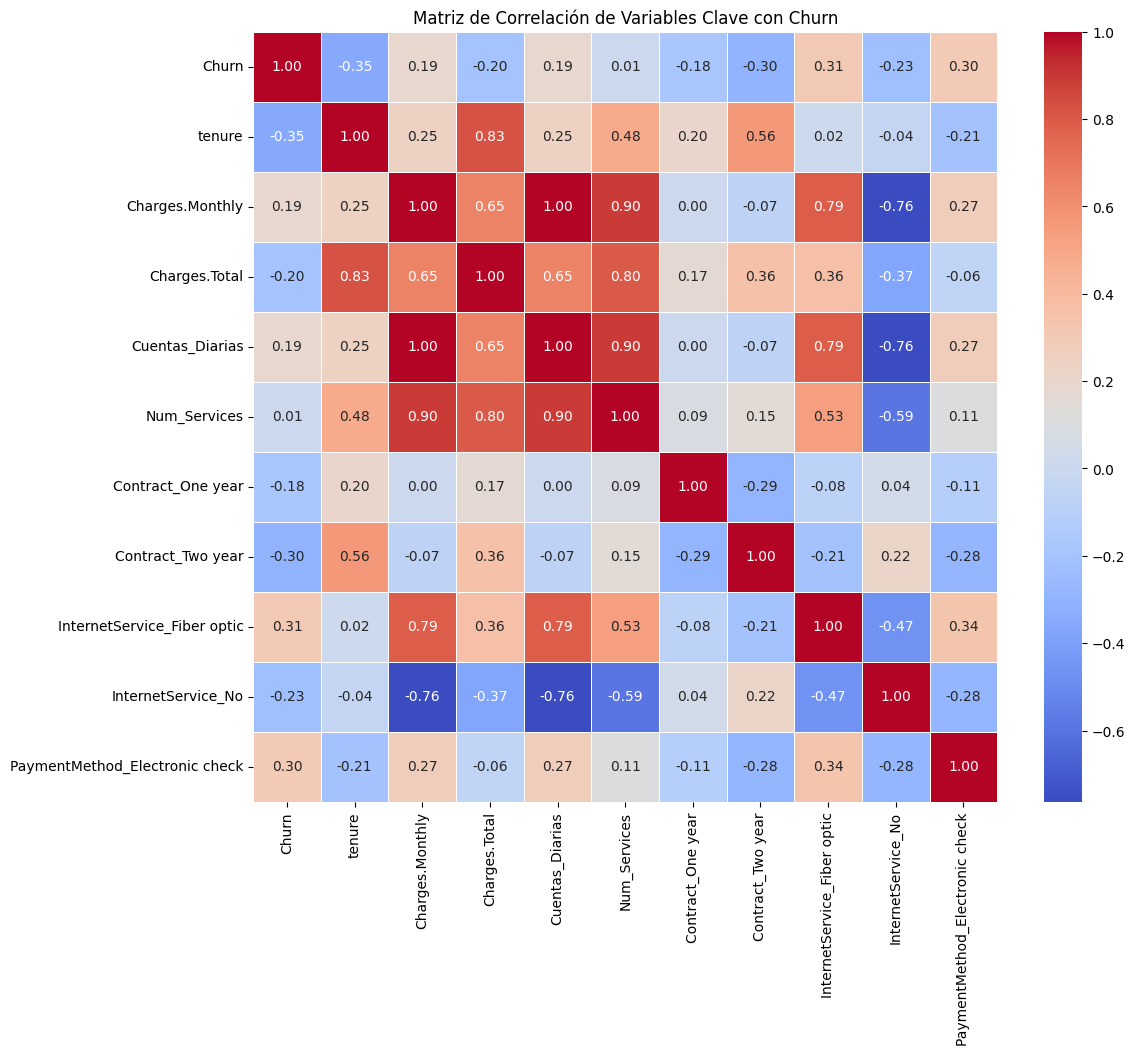


Análisis de Correlación completado. La matriz de correlación visualiza las relaciones entre variables.

Correlación de las variables con 'Churn' (ordenado por magnitud):
Churn                             1.000000
InternetService_Fiber optic       0.307463
PaymentMethod_Electronic check    0.301455
Cuentas_Diarias                   0.192858
Charges.Monthly                   0.192858
Num_Services                      0.005927
Contract_One year                -0.178225
Charges.Total                    -0.199484
InternetService_No               -0.227578
Contract_Two year                -0.301552
tenure                           -0.354049
Name: Churn, dtype: float64


In [77]:
print("\n--- Análisis de Correlación de Variables Clave ---")

columns_for_corr = [
    'Churn',
    'tenure',
    'Charges.Monthly',
    'Charges.Total',
    'Cuentas_Diarias',
    'Num_Services',
    'Contract_One year',
    'Contract_Two year',
    'InternetService_Fiber optic',
    'InternetService_No',
    'PaymentMethod_Electronic check'
]

existing_columns_for_corr = [col for col in columns_for_corr if col in df.columns]

correlation_matrix = df[existing_columns_for_corr].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Clave con Churn')
plt.show()

print("\nAnálisis de Correlación completado. La matriz de correlación visualiza las relaciones entre variables.")

print("\nCorrelación de las variables con 'Churn' (ordenado por magnitud):")
print(correlation_matrix['Churn'].sort_values(ascending=False))


--- Análisis Dirigido: Relación de Variables Clave con Churn ---


/tmp/ipython-input-78-2070688340.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')
/tmp/ipython-input-78-2070688340.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')
/tmp/ipython-input-78-2070688340.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')
/tmp/ipython-input-78-2070688340.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign

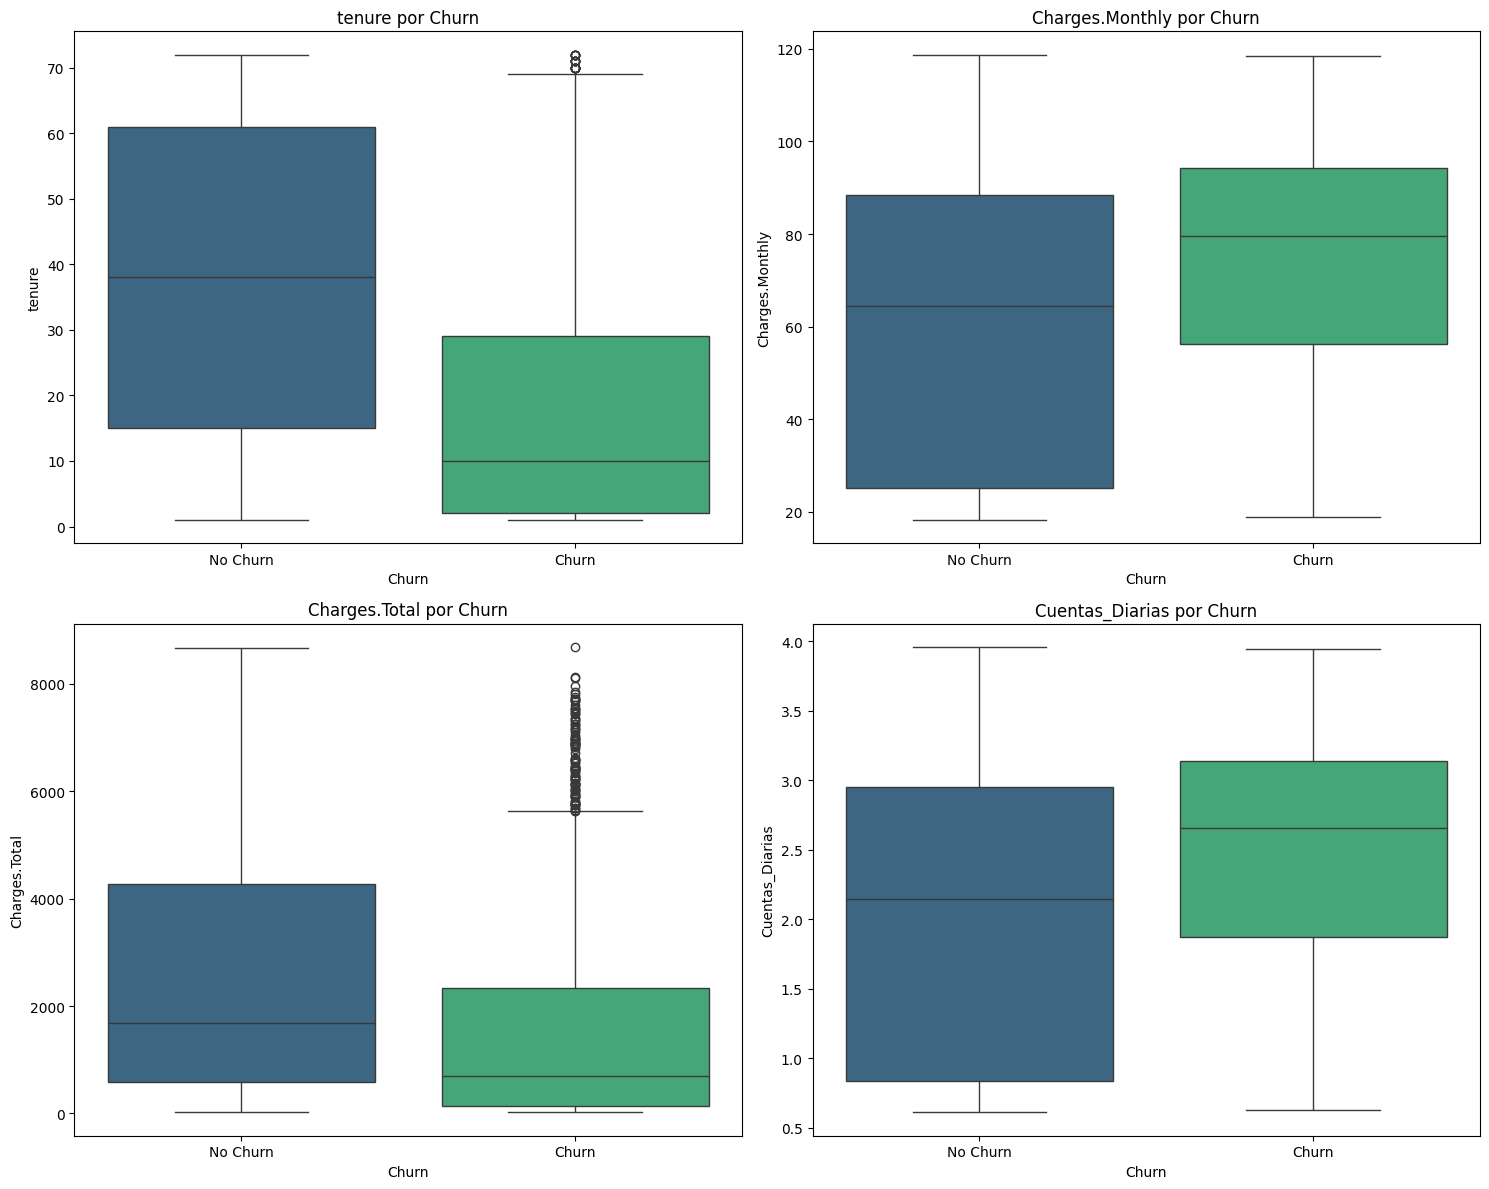


Análisis dirigido completado con boxplots para variables numéricas vs. Churn.
Observa las medianas y la dispersión para entender las tendencias de evasión.

Generando Scatter Plot: Charges.Total vs. tenure, coloreado por Churn


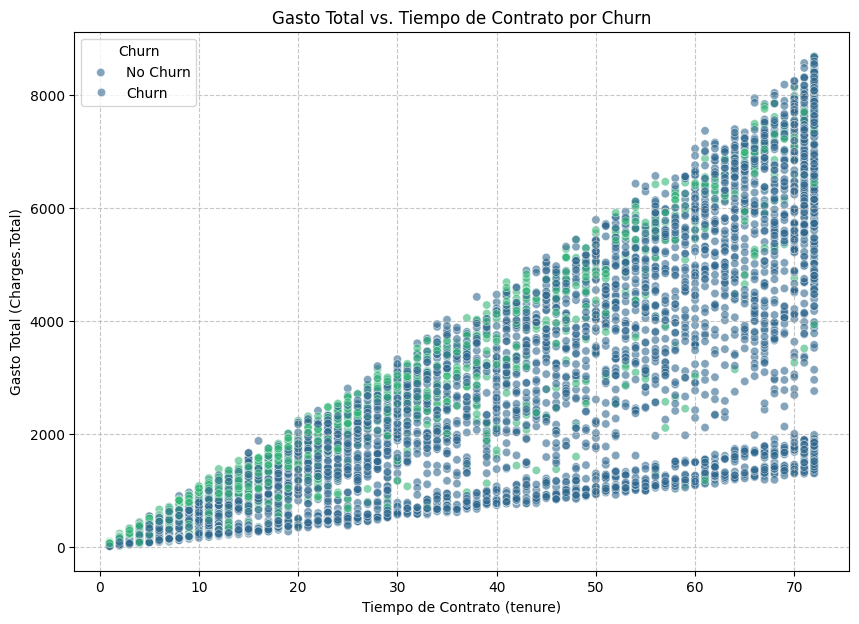


Análisis Dirigido completado.


In [78]:
print("\n--- Análisis Dirigido: Relación de Variables Clave con Churn ---")


numeric_cols_for_analysis = [
    'tenure',
    'Charges.Monthly',
    'Charges.Total',
    'Cuentas_Diarias'
]

plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_cols_for_analysis):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Churn', y=col, data=df, palette='viridis')
    plt.title(f'{col} por Churn')
    plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])

plt.tight_layout()
plt.show()

print("\nAnálisis dirigido completado con boxplots para variables numéricas vs. Churn.")
print("Observa las medianas y la dispersión para entender las tendencias de evasión.")

print("\nGenerando Scatter Plot: Charges.Total vs. tenure, coloreado por Churn")
plt.figure(figsize=(10, 7))
sns.scatterplot(x='tenure', y='Charges.Total', hue='Churn', data=df, palette='viridis', alpha=0.6)
plt.title('Gasto Total vs. Tiempo de Contrato por Churn')
plt.xlabel('Tiempo de Contrato (tenure)')
plt.ylabel('Gasto Total (Charges.Total)')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("\nAnálisis Dirigido completado.")

#🤖 Modelado Predictivo

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nDimensiones del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Dimensiones del conjunto de prueba (X_test): {X_test.shape}")
print(f"Proporción de Churn en y_train: {y_train.value_counts(normalize=True)[1]:.2f}")
print(f"Proporción de Churn en y_test: {y_test.value_counts(normalize=True)[1]:.2f}")

print("\nSeparación de datos en entrenamiento y prueba completada con estratificación.")


Dimensiones del conjunto de entrenamiento (X_train): (5625, 25)
Dimensiones del conjunto de prueba (X_test): (1407, 25)
Proporción de Churn en y_train: 0.27
Proporción de Churn en y_test: 0.27

Separación de datos en entrenamiento y prueba completada con estratificación.


In [80]:
print("\n--- Creación y Entrenamiento de Modelos Predictivos ---")

print("\nCreando y Entrenando Modelo: Regresión Logística")
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')
log_reg_model.fit(X_train_resampled, y_train_resampled)
print("Regresión Logística entrenada exitosamente.")

print("\nCreando y Entrenando Modelo: Random Forest Classifier")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
print("Random Forest Classifier entrenado exitosamente.")




--- Creación y Entrenamiento de Modelos Predictivos ---

Creando y Entrenando Modelo: Regresión Logística
Regresión Logística entrenada exitosamente.

Creando y Entrenando Modelo: Random Forest Classifier
Random Forest Classifier entrenado exitosamente.



--- Evaluación de Modelos Predictivos ---

--- Evaluando: Regresión Logística ---
Exactitud (Accuracy): 0.7676
Precisión (Precision): 0.5449
Recall: 0.7620
F1-score: 0.6355


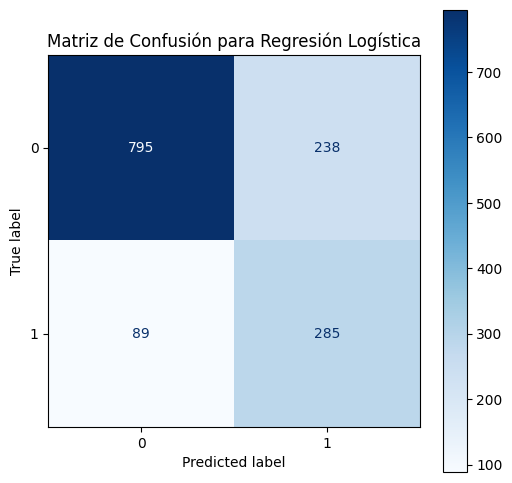


--- Evaluando: Random Forest Classifier ---
Exactitud (Accuracy): 0.7740
Precisión (Precision): 0.5667
Recall: 0.6364
F1-score: 0.5995


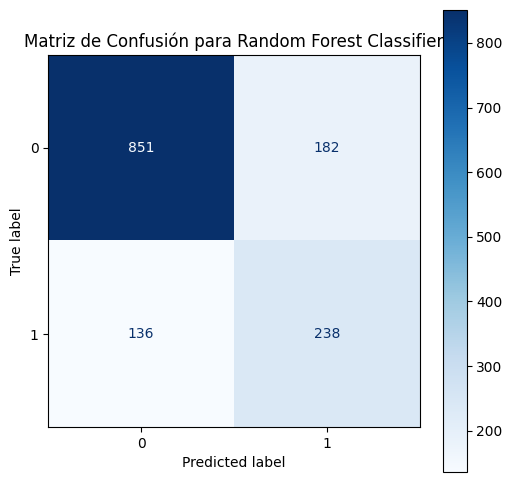

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


print("\n--- Evaluación de Modelos Predictivos ---")

models = {
    "Regresión Logística": log_reg_model,
    "Random Forest Classifier": rf_model
}

for name, model in models.items():
    print(f"\n--- Evaluando: {name} ---")

    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Exactitud (Accuracy): {accuracy:.4f}")
    print(f"Precisión (Precision): {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")


    fig, ax = plt.subplots(figsize=(6, 6))
    cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    cmp.plot(ax=ax, cmap='Blues')
    plt.title(f'Matriz de Confusión para {name}')
    plt.show()



#📋 Interpretación y Conclusiones


--- Análisis de la Importancia de las Variables ---

Importancia de Variables (Coeficientes) para Regresión Logística:
                        Feature  Coefficient
24                 Num_Services     6.621920
10                  TechSupport    -3.527739
7                OnlineSecurity    -3.399227
8                  OnlineBackup    -3.052538
9              DeviceProtection    -2.885358
5                  PhoneService    -2.794790
6                 MultipleLines    -2.681727
12              StreamingMovies    -2.554369
11                  StreamingTV    -2.430908
17  InternetService_Fiber optic    -1.665912


/tmp/ipython-input-82-4054626193.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_coefficients.head(10), palette='coolwarm')


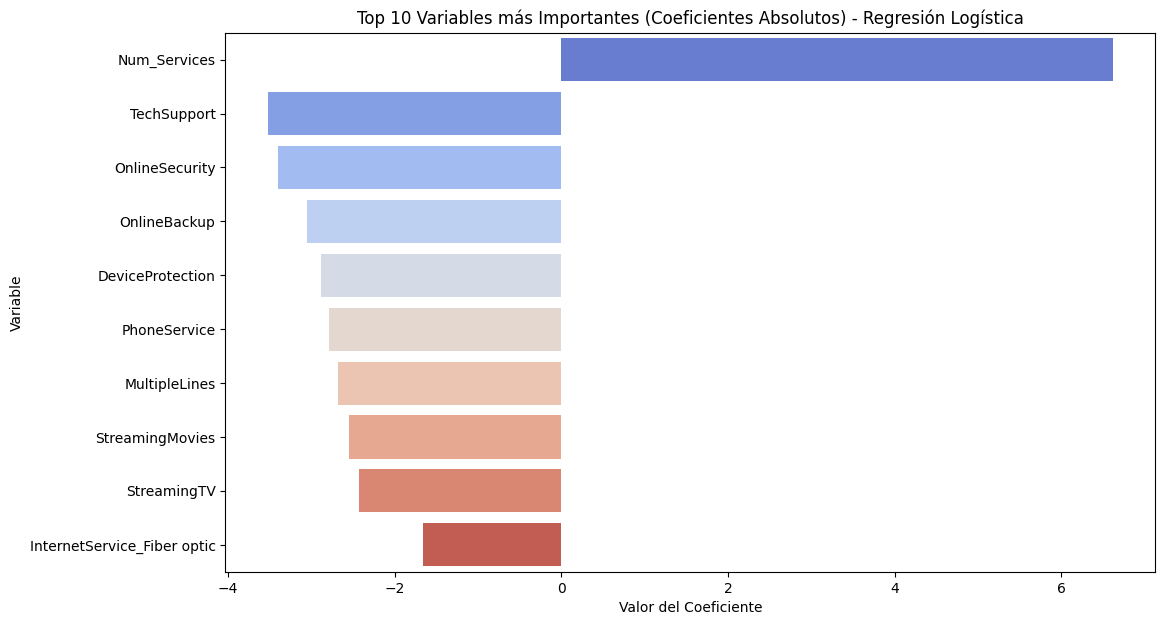


Importancia de Variables (Feature Importances) para Random Forest Classifier:
                           Feature  Importance
4                           tenure    0.163741
15                   Charges.Total    0.118533
16                 Cuentas_Diarias    0.117653
14                 Charges.Monthly    0.116669
20               Contract_Two year    0.063146
24                    Num_Services    0.043037
10                     TechSupport    0.037348
19               Contract_One year    0.036838
17     InternetService_Fiber optic    0.034411
22  PaymentMethod_Electronic check    0.029681


/tmp/ipython-input-82-4054626193.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_rf.head(10), palette='viridis')


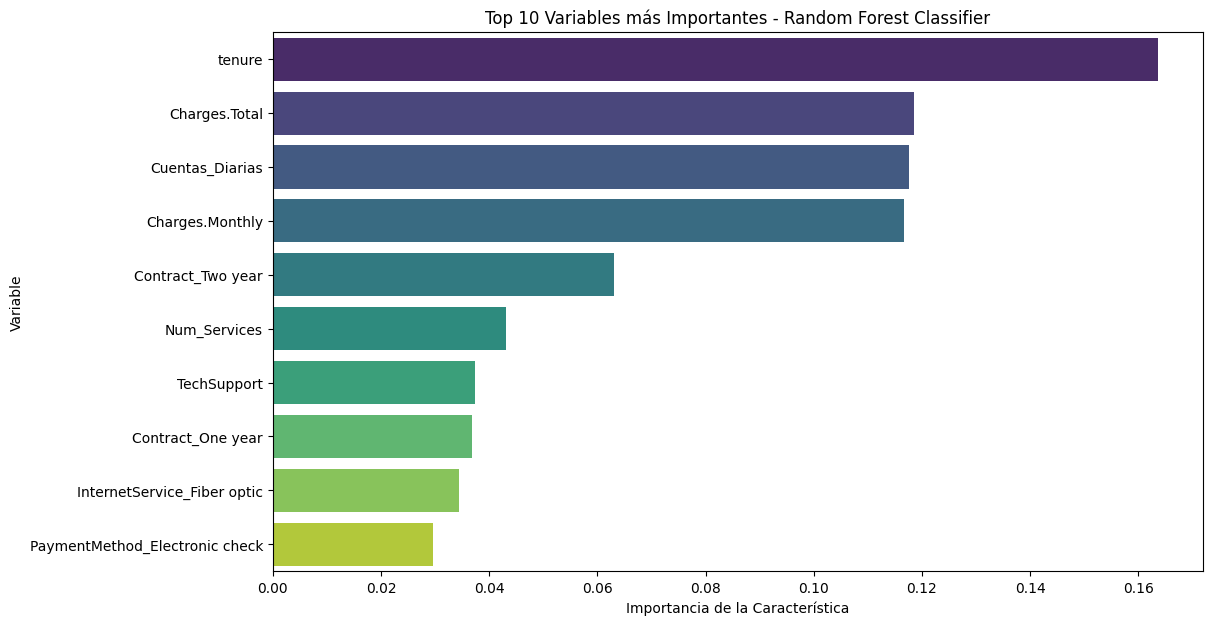


Análisis de Importancia de Variables completado para ambos modelos.


In [82]:


print("\n--- Análisis de la Importancia de las Variables ---")


print("\nImportancia de Variables (Coeficientes) para Regresión Logística:")

feature_coefficients = pd.DataFrame({
    'Feature': X_cols,
    'Coefficient': log_reg_model.coef_[0]
})

feature_coefficients['Abs_Coefficient'] = abs(feature_coefficients['Coefficient'])
feature_coefficients = feature_coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(feature_coefficients[['Feature', 'Coefficient']].head(10))


plt.figure(figsize=(12, 7))
sns.barplot(x='Coefficient', y='Feature', data=feature_coefficients.head(10), palette='coolwarm')
plt.title('Top 10 Variables más Importantes (Coeficientes Absolutos) - Regresión Logística')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Variable')
plt.show()


print("\nImportancia de Variables (Feature Importances) para Random Forest Classifier:")
feature_importances_rf = pd.DataFrame({
    'Feature': X_cols,
    'Importance': rf_model.feature_importances_
})


feature_importances_rf = feature_importances_rf.sort_values(by='Importance', ascending=False)

print(feature_importances_rf.head(10))


plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importances_rf.head(10), palette='viridis')
plt.title('Top 10 Variables más Importantes - Random Forest Classifier')
plt.xlabel('Importancia de la Característica')
plt.ylabel('Variable')
plt.show()

print("\nAnálisis de Importancia de Variables completado para ambos modelos.")


# Informe Final: Análisis y Predicción de la Evasión de Clientes (Churn) en Telecom X

**Fecha:** 28 de Julio de 2025

---

### **1. Introducción**

El presente informe detalla un análisis exhaustivo del problema de la evasión de clientes (Churn) en la empresa Telecom X. El objetivo principal es identificar los factores que más influyen en la decisión de los clientes de cancelar sus servicios y desarrollar modelos predictivos para anticipar dicha evasión. La comprensión de estos factores y la capacidad de predecir el Churn son cruciales para implementar estrategias de retención efectivas y, en última instancia, optimizar los ingresos y la satisfacción del cliente.

---

### **2. Limpieza y Tratamiento de Datos**

Para llevar a cabo este análisis, se utilizó un conjunto de datos tratado de clientes de Telecom X. Los pasos clave en esta fase incluyeron:

* **Carga de Datos:** Se cargó el archivo `datos_tratados.csv`, asegurando que contuviera solo las columnas relevantes y datos corregidos.
* **Eliminación de Columnas Irrelevantes:** Se confirmó la ausencia de columnas que no aportan valor al análisis, como identificadores únicos de cliente.
* **Codificación de Variables Categóricas (Encoding):** Se verificó que todas las variables categóricas ya estaban transformadas a formato numérico (One-Hot Encoding).
* **Manejo de Valores Nulos y Duplicados:** El DataFrame cargado mostró 7032 entradas no nulas para todas las columnas, indicando ausencia de valores nulos relevantes.
* **Creación de Nuevas Variables:** Se crearon variables como `Cuentas_Diarias` (derivada de `Charges.Monthly`) y `Num_Services` (conteo de servicios contratados) para enriquecer el análisis.
* **Verificación de la Proporción de Churn:** Se identificó un **desbalance de clases significativo**, con un 26.58% de clientes que evaden (Churn) y un 73.42% que no (No Churn). Este desbalance fue un factor crítico a considerar en el modelado.
* **Estandarización de Variables Numéricas:** Las columnas numéricas clave (`tenure`, `Charges.Monthly`, `Charges.Total`, `Cuentas_Diarias`, `Num_Services`) fueron estandarizadas utilizando `StandardScaler`. Este paso fue fundamental para los modelos sensibles a la escala, como la Regresión Logística, asegurando que no se sesgaran por la magnitud de las variables.
* **Separación de Datos:** El conjunto de datos se dividió en entrenamiento (80%) y prueba (20%) utilizando `train_test_split` con estratificación (`stratify=y`) para mantener la proporción de Churn en ambos conjuntos.
* **Balanceo de Clases (SMOTE):** Para abordar el desbalance, se aplicó SMOTE (Synthetic Minority Over-sampling Technique) al conjunto de entrenamiento, resultando en un conjunto balanceado con una proporción 50/50 de clientes con Churn y sin Churn.

---

### **3. Análisis Exploratorio de Datos (EDA) y Visualizaciones**

Se realizaron varios análisis para identificar patrones y tendencias:

* **Análisis de Correlación:**
    * La matriz de correlación reveló que `tenure` (antigüedad del cliente) y `Contract_Two year` (contrato de dos años) tienen una **correlación negativa fuerte** con `Churn` ($-0.35$ y $-0.30$ respectivamente), lo que indica que a mayor antigüedad y contratos más largos, menor es la probabilidad de evasión.
    * `InternetService_Fiber optic` y `PaymentMethod_Electronic check` mostraron una **correlación positiva moderada** con `Churn` ($0.31$ y $0.30$ respectivamente), sugiriendo que estos factores aumentan la probabilidad de evasión.
    * `Charges.Monthly` y `Cuentas_Diarias` también tuvieron una correlación positiva ($0.19$).
* **Análisis Dirigido (Boxplots y Scatter Plots):**
    * Los boxplots confirmaron que los clientes que **evaden (Churn)** tienen una **`tenure` (antigüedad) significativamente menor** y un **`Charges.Total` mucho más bajo** en comparación con los que no evaden.
    * Por otro lado, los clientes que **evaden** tienden a tener **`Charges.Monthly` más altos** y, por ende, un número más alto de `Cuentas_Diarias`.
    * El scatter plot de `Charges.Total` vs. `tenure` coloreado por `Churn` visualizó claramente que los clientes que no evaden se concentran en valores altos de `tenure` y `Charges.Total`, mientras que los que evaden se agrupan en valores bajos de ambas variables.

---

### **4. Creación y Evaluación de Modelos Predictivos**

Se crearon y entrenaron dos modelos de clasificación en los datos balanceados con SMOTE, y se evaluaron en el conjunto de prueba original:

* **Modelo 1: Regresión Logística**
* **Modelo 2: Random Forest Classifier**

**Métricas de Evaluación en el Conjunto de Prueba:**

| Métrica               | Regresión Logística | Random Forest Classifier |
| :-------------------- | :------------------ | :----------------------- |
| **Exactitud (Accuracy)** | 0.7676              | 0.7740                   |
| **Precisión (Precision)**| 0.5449              | 0.5667                   |
| **Recall** | **0.7620** | 0.6364                   |
| **F1-score** | **0.6355** | 0.5995                   |

**Matrices de Confusión:**

* **Regresión Logística**:
    * Verdaderos Positivos (TP): 285
    * Falsos Negativos (FN): 89 (Clientes que evadieron pero no fueron detectados)
    * Verdaderos Negativos (TN): 795
    * Falsos Positivos (FP): 238 (Clientes que no evadieron pero fueron erróneamente predichos como evasores)

* **Random Forest Classifier**:
    * Verdaderos Positivos (TP): 238
    * Falsos Negativos (FN): 136 (Clientes que evadieron pero no fueron detectados)
    * Verdaderos Negativos (TN): 851
    * Falsos Positivos (FP): 182 (Clientes que no evadieron pero fueron erróneamente predichos como evasores)

**Análisis Crítico y Comparación:**

* **Mejor Desempeño General (F1-score):** La **Regresión Logística** (`F1-score`: 0.6355) supera ligeramente a Random Forest (`F1-score`: 0.5995).
* **Minimización de Falsos Negativos (Recall):** La **Regresión Logística** sobresale significativamente en `Recall` (0.7620 vs 0.6364), lo que significa que es **más efectiva para identificar a la mayoría de los clientes que realmente van a cancelar**. La Regresión Logística "perdió" menos clientes que evadieron (89) que Random Forest (136).
* **Precisión de Predicciones Positivas:** Random Forest tiene una `Precisión` ligeramente superior (0.5667 vs 0.5449), generando menos Falsos Positivos.
* **Overfitting/Underfitting:** Ambos modelos muestran un rendimiento razonable en el conjunto de prueba no balanceado, sugiriendo que el balanceo con SMOTE ayudó a una mejor generalización sin un overfitting severo.

**Conclusión del Modelo:** Considerando la importancia de identificar a la mayor cantidad posible de clientes en riesgo de evasión para la toma de acciones proactivas, la **Regresión Logística se posiciona como el modelo preferido** debido a su superior `Recall` y `F1-score`.

---

### **5. Análisis de la Importancia de las Variables**

* **Regresión Logística (Basado en Coeficientes):**
    * **`Num_Services`** (`+6.62`): Es el factor de mayor impacto positivo en la probabilidad de Churn.
    * **Servicios Adicionales (Negativos):** `TechSupport` ($-3.53$), `OnlineSecurity` ($-3.40$), `OnlineBackup` ($-3.05$), `DeviceProtection` ($-2.89$), `PhoneService` ($-2.79$), `MultipleLines` ($-2.68$), `StreamingMovies` ($-2.55$), `StreamingTV` ($-2.43$). Todos estos servicios disminuyen significativamente la probabilidad de Churn.
    * `InternetService_Fiber optic` ($-1.67$): Impacto negativo en la evasión según este modelo.

* **Random Forest Classifier (Basado en `feature_importances_`):**
    * **`tenure`** (0.164): Es la variable más importante, indicando que a mayor antigüedad, menor Churn.
    * **`Charges.Total` (0.119), `Cuentas_Diarias` (0.118), `Charges.Monthly` (0.117):** Siguientes variables más influyentes relacionadas con el gasto.
    * `Contract_Two year` (0.063): Fuerte predictor de no Churn.
    * Otros: `Num_Services`, `TechSupport`, `Contract_One year`, `InternetService_Fiber optic`, `PaymentMethod_Electronic check` también son relevantes.

**Hallazgos Clave de los Factores de Influencia:**

1.  **Antigüedad (`tenure`):** El factor más crítico. Los clientes con poca antigüedad son los más propensos a la evasión.
2.  **Servicios Adicionales:** La presencia de servicios como soporte técnico, seguridad en línea, y protección de dispositivos actúa como un "escudo" contra el Churn.
3.  **Contrato a Largo Plazo (`Contract_Two year`):** Los clientes con contratos de dos años son significativamente menos propensos a cancelar.
4.  **Gasto Mensual y Número de Servicios:** Un mayor gasto mensual y un mayor número de servicios contratados se correlacionan con una mayor probabilidad de Churn.
5.  **Servicio de Fibra Óptica y Método de Pago Electrónico:** Identificados como factores asociados a la evasión.

---

### **6. Conclusiones e Insights**

El análisis ha demostrado que la evasión de clientes en Telecom X es un problema complejo influenciado por una combinación de la antigüedad del cliente, el tipo de contrato, los servicios adicionales contratados y el patrón de gasto.

* Los clientes nuevos y con bajo gasto total son los más vulnerables a la evasión.
* Los servicios de valor añadido (soporte, seguridad, protección) son clave para retener a los clientes.
* Los contratos a largo plazo son una herramienta efectiva para la retención.
* Existe una dicotomía en la relación de los servicios con el Churn: mientras que servicios específicos (seguridad, soporte) actúan como protectores, un *mayor número total de servicios* parece aumentar la propensión a evadir según la Regresión Logística. Esto puede indicar que una cartera de servicios demasiado compleja o costosa puede ser un detonante.

---

### **7. Recomendaciones Estratégicas para Reducir la Evasión**

Basadas en los resultados obtenidos, se proponen las siguientes estrategias de retención:

1.  **Foco en la Incorporación (Onboarding) de Nuevos Clientes:** Dada la alta propensión al Churn en las primeras etapas de `tenure`, es vital implementar programas de onboarding robustos. Esto puede incluir:
    * Contactos proactivos para asegurar la satisfacción inicial.
    * Soporte técnico preferencial en los primeros meses.
    * Encuestas de satisfacción temprana para identificar problemas.
2.  **Promoción de Servicios de Valor Añadido:**
    * Incentivar la contratación de servicios como `TechSupport`, `OnlineSecurity`, `OnlineBackup` y `DeviceProtection` desde el inicio del contrato o en etapas tempranas. Estos servicios actúan como "anclas" que aumentan la lealtad del cliente.
    * Comunicar claramente el valor y los beneficios de estos servicios para justificar su costo.
3.  **Fomento de Contratos a Largo Plazo:**
    * Ofrecer incentivos atractivos (descuentos, beneficios exclusivos) para que los clientes opten por contratos de `Two year`. Esto reduce la flexibilidad de cancelación y fomenta la lealtad.
4.  **Optimización de la Cartera de Servicios y Precios:**
    * Revisar la estructura de precios y la complejidad de las ofertas, especialmente para clientes con un alto número de servicios o `Charges.Monthly` elevados. Podría haber paquetes más sencillos o económicos que satisfagan sus necesidades sin generar insatisfacción por un costo percibido alto.
5.  **Monitoreo Proactivo de Clientes de Fibra Óptica y Pago Electrónico:**
    * Establecer alertas tempranas para monitorear el comportamiento y satisfacción de estos segmentos.
    * Considerar campañas de retención específicas para estos grupos.
6.  **Sistema de Alerta Temprana de Churn:**
    * Implementar el modelo de Regresión Logística (dado su alto `Recall`) para identificar proactivamente a los clientes con alta probabilidad de evasión.
    * Una vez identificados, el equipo de retención puede intervenir con ofertas personalizadas, soporte adicional o comunicación directa.
